# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [497]:
# place your code into this Code cell
data = pd.read_csv (r'data/MBSComtrade.csv')

Data link: https://unstats.un.org/unsd/trade/data/tables.asp

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In [151]:
data.sample(5)

,series_type,table_type,table_type_desc,country_code,country_type,country_english_name,year,period_type,period_number,period,...,partner_country_code,partner_country_english_name,base_year,currency_type,value,value_unit,value_type,value_type_desc,estimation_type,estimation_type_desc
933,T36.A.P.,T36,"Total trade - value, volume, unit value",36,C,Australia,1984,A,0,198452,...,0,World,2000,NaN,65.535887,NaN,P,Price,A,Actual
620,T36.A.P.,T36,"Total trade - value, volume, unit value",300,C,Greece,1975,A,0,197552,...,0,World,2000,NaN,4.208012,NaN,P,Price,A,Actual
1614,T36.A.P.,T36,"Total trade - value, volume, unit value",702,C,Singapore,2000,A,0,200052,...,0,World,2000,NaN,100.000000,NaN,P,Price,A,Actual
2104,T36.A.P.,T36,"Total trade - value, volume, unit value",862,C,Venezuela (Bolivarian Rep. of),2010,A,0,201052,...,0,World,2000,NaN,895.495657,NaN,P,Price,A,Actual
1471,T36.A.P.,T36,"Total trade - value, volume, unit value",616,C,Poland,1997,A,0,199752,...,0,World,2000,NaN,85.814985,NaN,P,Price,A,Actual


In [152]:
data.dtypes

series_type                      object
table_type                       object
table_type_desc                  object
country_code                      int64
country_type                     object
country_english_name             object
year                              int64
period_type                      object
period_number                     int64
period                            int64
period_in_date                   object
trade_flow                       object
trade_flow_desc                  object
commodity_group_code              int64
commodity_group_name             object
partner_country_code              int64
partner_country_english_name     object
base_year                         int64
currency_type                   float64
value                           float64
value_unit                      float64
value_type                       object
value_type_desc                  object
estimation_type                  object
estimation_type_desc             object


In [218]:
data.describe()

,country_code,year,period_number,period,commodity_group_code,partner_country_code,base_year,value
count,2538.000000,2538.000000,2538.0,2538.000000,2538.0,2538.0,2538.0,2538.000000
mean,445.088258,1990.176517,0.0,199069.651694,1.0,0.0,2000.0,81.468952
std,255.062491,19.073917,0.0,1907.391717,0.0,0.0,0.0,135.566760
min,36.000000,1946.000000,0.0,194652.000000,1.0,0.0,2000.0,0.072954
25%,246.000000,1975.000000,0.0,197552.000000,1.0,0.0,2000.0,29.502922
50%,410.000000,1992.000000,0.0,199252.000000,1.0,0.0,2000.0,88.349208
75%,620.000000,2006.000000,0.0,200652.000000,1.0,0.0,2000.0,106.155526
max,862.000000,2020.000000,0.0,202052.000000,1.0,0.0,2000.0,5551.177577


<br>

The names of the countries that the dataset is representing:

In [160]:
data.country_english_name.unique()

array(['Sweden', 'Australia', 'Austria', 'New Zealand', 'Portugal',
       'United States', 'Venezuela (Bolivarian Rep. of)', 'Japan',
       'Colombia', 'Germany', 'Poland', 'Greece', 'Mauritius', 'Finland',
       'United Kingdom', 'Hungary', 'Korea, Republic of', 'Singapore',
       'Mexico', 'Philippines', 'Czechia', 'Estonia',
       'Iran (Islamic Rep. of)', 'France', 'Slovakia', 'Bulgaria'],
      dtype=object)

As we can see above, the country makeup leans heavily towards Europe, with a few South American countries, a few North American Countries, and a few from Asia. 

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

There are a few columns in the beginning that give details about this table in reference to another series of tables, not relavant to our analysis. I am removing them here. 

In [168]:
del data['series_type']
del data['table_type']
del data['table_type_desc']

Let us look for and delete NA values in our dataset

In [243]:
data = data.dropna(subset=['value', 'trade_flow'])

From our data.describe command earlier, we can see that the currency_type column and the value_unit column are both just nan, so we drop those too. 

In [174]:
print(data.currency_type.unique())
print(data.value_unit.unique())

[nan]
[nan]


In [175]:
del data['currency_type']
del data['value_unit']

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

### 1. Top 3 export countries and bottom 3 export countries:

In [196]:
data[data['trade_flow'] == 'X'].sort_values(by='value', ascending = False).head(3)

,country_code,country_type,country_english_name,year,period_type,period_number,period,period_in_date,trade_flow,trade_flow_desc,commodity_group_code,commodity_group_name,partner_country_code,partner_country_english_name,base_year,value,value_type,value_type_desc,estimation_type,estimation_type_desc
2468,170,C,Colombia,2019,A,0,201952,01/01/2019,X,Exports,1,Total,0,World,2000,294.802993,P,Price,C,Calculate
2424,170,C,Colombia,2018,A,0,201852,01/01/2018,X,Exports,1,Total,0,World,2000,277.381743,P,Price,C,Calculate
2156,170,C,Colombia,2012,A,0,201252,01/01/2012,X,Exports,1,Total,0,World,2000,260.407999,P,Price,C,Calculate


In [197]:
data[data['trade_flow'] == 'X'].sort_values(by='value', ascending = True).head(3)

,country_code,country_type,country_english_name,year,period_type,period_number,period,period_in_date,trade_flow,trade_flow_desc,commodity_group_code,commodity_group_name,partner_country_code,partner_country_english_name,base_year,value,value_type,value_type_desc,estimation_type,estimation_type_desc
402,616,C,Poland,1968,A,0,196852,01/01/1968,X,Exports,1,Total,0,World,2000,0.072954,P,Price,A,Actual
430,616,C,Poland,1969,A,0,196952,01/01/1969,X,Exports,1,Total,0,World,2000,0.074493,P,Price,A,Actual
374,616,C,Poland,1967,A,0,196752,01/01/1967,X,Exports,1,Total,0,World,2000,0.074493,P,Price,A,Actual


### 2. Top 3 import countries and bottom 3 import countries

In [212]:
data[data['trade_flow']=='M'].sort_values(by='value', ascending = False).head(3)

,country_code,country_type,country_english_name,year,period_type,period_number,period,period_in_date,trade_flow,trade_flow_desc,commodity_group_code,commodity_group_name,partner_country_code,partner_country_english_name,base_year,value,value_type,value_type_desc,estimation_type,estimation_type_desc
2329,862,C,Venezuela (Bolivarian Rep. of),2015,A,0,201552,01/01/2015,M,Imports,1,Total,0,World,2000,5551.177577,P,Price,A,Actual
2284,862,C,Venezuela (Bolivarian Rep. of),2014,A,0,201452,01/01/2014,M,Imports,1,Total,0,World,2000,2242.724098,P,Price,A,Actual
2239,862,C,Venezuela (Bolivarian Rep. of),2013,A,0,201352,01/01/2013,M,Imports,1,Total,0,World,2000,1622.414256,P,Price,A,Actual


In [213]:
data[data['trade_flow']=='M'].sort_values(by='value', ascending = True).head(3)

,country_code,country_type,country_english_name,year,period_type,period_number,period,period_in_date,trade_flow,trade_flow_desc,commodity_group_code,commodity_group_name,partner_country_code,partner_country_english_name,base_year,value,value_type,value_type_desc,estimation_type,estimation_type_desc
41,862,C,Venezuela (Bolivarian Rep. of),1950,A,0,195052,01/01/1950,M,Imports,1,Total,0,World,2000,0.142725,P,Price,A,Actual
97,862,C,Venezuela (Bolivarian Rep. of),1954,A,0,195452,01/01/1954,M,Imports,1,Total,0,World,2000,0.149034,P,Price,A,Actual
111,862,C,Venezuela (Bolivarian Rep. of),1955,A,0,195552,01/01/1955,M,Imports,1,Total,0,World,2000,0.150570,P,Price,A,Actual


Interestingly in this case, they're both Venezuala (in different years).

<br>

### 3. Finding the number of years for which we have data for each country
I'm doing this just for importing data. For this, I'll create a separate dataset called `import_data`.

In [223]:
import_data = data[data['trade_flow']=='M']

import_data.groupby('country_english_name')['country_english_name'].count()

country_english_name
Australia                         73
Austria                           73
Bulgaria                          20
Colombia                          50
Czechia                           27
Estonia                           23
Finland                           58
France                            22
Germany                           63
Greece                            59
Hungary                           50
Iran (Islamic Rep. of)             6
Japan                             71
Korea, Republic of                50
Mauritius                         60
Mexico                            41
New Zealand                       72
Philippines                       17
Poland                            61
Portugal                          63
Singapore                         49
Slovakia                          20
Sweden                            75
United Kingdom                    56
United States                     72
Venezuela (Bolivarian Rep. of)    68
Name: country_eng

### 4. Mean of Australian import data
Since we have the most data for Australia, I'd like to delve deeper into this data.
1. Mean overall
2. Mean after the year 2000

In [227]:
#1. Overall Mean
import_data[import_data['country_english_name']=='Australia']['value'].mean()

54.085911909863015

In [226]:
#2. Mean affter teh year 2000. 
import_data[(import_data['year']>=2000) & (import_data['country_english_name']=='Australia')]['value'].mean()

96.28121643095237

<br>

### 5. Import Export Difference
I'd like to explore the trade balance of countries over the years, where trade balance = export value - import value. 
Since import export values aren't given in the same table, I will have to create a new dataframe. 
Within this, I'll create a new variable called `trade_balance`. 

In [368]:
tb_data = pd.DataFrame({})

In [369]:
#first, just import export data only (we already have a separate import_data dataset)
tb_data = data[(data['trade_flow']=='X')]

#reset indexes
tb_data.reset_index(drop=True, inplace=True)


In [370]:
#empty series
import_list = []

for row_num in range(len(tb_data)):
    x_row = tb_data.iloc[row_num]
#     print(row['email'])
    
    temp_import_ser = import_data[(import_data['country_english_name']==x_row['country_english_name']) & (import_data['year']==x_row['year'])]['value']
    
    if len(temp_import_ser) != 0:
        temp_import_val = temp_import_ser.to_numpy()[0]
        
    else:
        #"mismatch" where we only have data for the exports of that year and not the imports
        temp_import_val = np.nan
    
    import_list.append(temp_import_val)
    
    

In [373]:
import_series = pd.Series(import_list)

In [374]:
tb_data = tb_data.assign(import_val=import_series)

Now to edit our tb_data table to make it a little more usable:

In [375]:
#rename value to 'export_val'
tb_data.rename(columns = {'value':'export_val'}, inplace = True)

#drop na values from our table
tb_data = tb_data.dropna(subset=['import_val'])

#remove 'trade_flow', 'trade_flow_desc' since they're no longer relavant
del tb_data['trade_flow']
del tb_data['trade_flow_desc']


In [376]:
#adding in the trade_balance variable
tb_data['trade_balance'] = tb_data['export_val'] - tb_data['import_val']


In [377]:
tb_data['trade_balance']

0        8.957435
1        1.578780
2        8.890206
3        1.106153
4        0.038659
          ...    
1234   -14.137463
1235    18.306588
1236   -15.307465
1237    29.364108
1238   -11.690182
Name: trade_balance, Length: 1220, dtype: float64

<br>

### 6. Running group aggregate functions with trade balance

In [379]:
tb_data.groupby('country_english_name')['trade_balance'].mean().sort_values()

country_english_name
Philippines              -13.303002
Korea, Republic of       -13.266276
Finland                   -7.439427
Mauritius                 -5.951089
Austria                   -3.372776
Greece                    -2.999369
Germany                   -2.724368
Sweden                    -1.443861
Hungary                   -0.554392
Portugal                   0.286648
United Kingdom             1.301712
United States              1.570354
Poland                     3.182013
France                     3.284053
New Zealand                3.591275
Czechia                    3.856527
Singapore                  4.206152
Japan                      6.136791
Mexico                     8.777382
Iran (Islamic Rep. of)    13.054467
Bulgaria                  15.299185
Slovakia                  18.491865
Australia                 20.459337
Colombia                  32.086246
Estonia                   44.432768
Name: trade_balance, dtype: float64

Countries that have a positive trade balance are in a "trade surplus". Countries with a negative trade balance are in a "trade deficit". 

Let us look at a more recent estimate, for years after 2016:

In [391]:
tb_data[tb_data['year']> 2016].groupby('country_english_name')['trade_balance'].mean().sort_values()

country_english_name
Korea, Republic of    -59.875396
Japan                 -41.547919
Finland               -29.217001
Singapore             -15.640743
Sweden                -12.828024
Mexico                -10.700052
Greece                -10.263126
Austria                -7.717835
United States          -5.555549
Hungary                -5.175694
Mauritius              -4.305242
Germany                -1.281544
United Kingdom          0.241819
Czechia                 5.413527
France                 16.879196
Poland                 17.966243
Bulgaria               27.401335
Slovakia               27.860348
New Zealand            36.555338
Estonia                60.526542
Australia              85.703237
Colombia              108.076656
Name: trade_balance, dtype: float64

<br>

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### 1. Plotting Export values for the year 2010

In [433]:
exports_2010 = data[(data['year']==2010) & (data['trade_flow']=='X')][['value', 'country_english_name']]
exports_2010 = exports_2010.set_index('country_english_name')

<AxesSubplot:ylabel='country_english_name'>

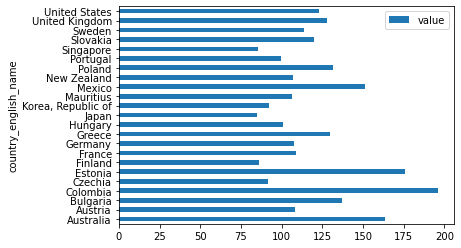

In [437]:
exports_2010.plot.barh(y="value")

### 2. Plotting Australia's export, import, and trade balance values

In [414]:
australia_viz_df = pd.DataFrame({
    'export values': tb_data[tb_data['country_english_name']=='Australia']['export_val'],
    'import values': tb_data[tb_data['country_english_name']=='Australia']['import_val'],
    'trade balance': tb_data[tb_data['country_english_name']=='Australia']['trade_balance'],
    'year': tb_data[tb_data['country_english_name']=='Australia']['year']
})
#reset index
australia_viz_df.reset_index(drop=True, inplace=True)
#, index = list(tb_data[tb_data['country_english_name']=='Australia']['year']))

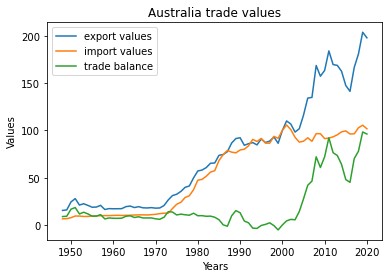

In [462]:
plt.plot(australia_viz_df.iloc[:, 3], australia_viz_df.iloc[:, 0], label = 'export values')
plt.plot(australia_viz_df.iloc[:, 3], australia_viz_df.iloc[:, 1], label = 'import values')
plt.plot(australia_viz_df.iloc[:, 3], australia_viz_df.iloc[:, 2], label = 'trade balance')
plt.xlabel("Years")
plt.ylabel("Values")
plt.title("Australia trade values")
plt.legend()

<br>

### 3. Plotting mean trade balance of all countries

<AxesSubplot:xlabel='country_english_name'>

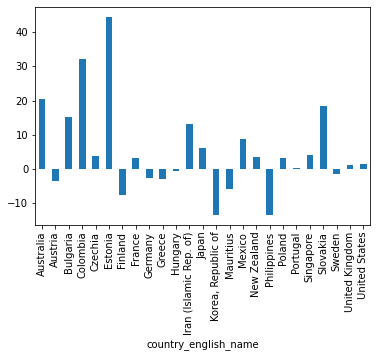

In [440]:
mean_tb = tb_data.groupby('country_english_name')['trade_balance'].mean()
mean_tb.plot.bar()

<br>

### 4. Area chart of countries' exports and imports

In [464]:
area_df = pd.DataFrame({
    'export values': tb_data['export_val'],
    'import values': tb_data['import_val'],
#     'trade balance': tb_data['trade_balance'],
    'year': tb_data['year']
})
#reset index
area_df.reset_index(drop=True, inplace=True)
area_df = area_df.set_index('year')

<AxesSubplot:xlabel='Years', ylabel='Values'>

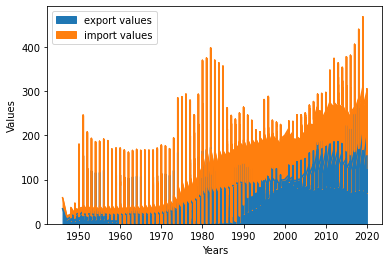

In [465]:
area_df.plot.area(
    xlabel='Years', 
    ylabel='Values', 
#     stacked=False #because there are negative values in the TB
)

With Trade Balance

<AxesSubplot:xlabel='Years', ylabel='Values'>

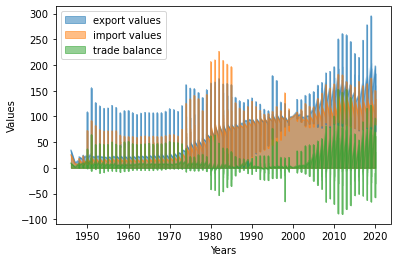

In [466]:
area_df = pd.DataFrame({
    'export values': tb_data['export_val'],
    'import values': tb_data['import_val'],
     'trade balance': tb_data['trade_balance'],
    'year': tb_data['year']
})
#reset index
area_df.reset_index(drop=True, inplace=True)
area_df = area_df.set_index('year')

area_df.plot.area(
    xlabel='Years', 
    ylabel='Values', 
     stacked=False #because there are negative values in the TB
)

### 5. Pie chart of import share for the year 2010

In [502]:
import2010_series = data[(data['year']==2010) & (data['trade_flow']=='M')]
import2010_vals = import2010_series['value']
total = sum(import2010_series['value'].to_numpy())
share_list = import2010_series['value']/total

In [503]:
piechart_df = pd.DataFrame({
    'countries': data[(data['year']==2010) & (data['trade_flow']=='M')]['country_english_name'],
    'shares': (share_list)
})

piechart_df = piechart_df.set_index('countries')

<AxesSubplot:ylabel='shares'>

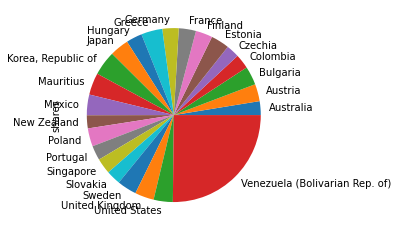

In [504]:
piechart_df.plot.pie(y='shares', legend=False)